In [84]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
import pandas as pd
import json

# Load JSON data
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)

# Convert to DataFrame
data = pd.DataFrame(data)

data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [86]:
print(data.isnull().sum())

print(data.describe())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64
       trips_in_first_30_days  avg_rating_of_driver     avg_surge  \
count            50000.000000          41878.000000  50000.000000   
mean                 2.278200              4.601559      1.074764   
std                  3.792684              0.617338      0.222336   
min                  0.000000              1.000000      1.000000   
25%                  0.000000              4.300000      1.000000   
50%                  1.000000              4.900000      1.000000   
75%                  3.000000              5.000000      1.050000   
max                125.000000              5.000000      8.0000

In [87]:
# Convert signup_date and last_trip_date to datetime
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

# Latest day of the data to go back one month from 
print(data['last_trip_date'].max())

# Create the retention_status column
data['retention_status'] = (data['last_trip_date'] >= '2014-06-01').astype(int)

# Display the updated DataFrame
data.head()

2014-07-01 00:00:00


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention_status
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [88]:
# Calculate the fraction of retained users
retained_users = data['retention_status'].sum()
total_users = len(data)
retention_fraction = retained_users / total_users
print(f"Fraction of retained users: {retention_fraction:.2f}")

Fraction of retained users: 0.38


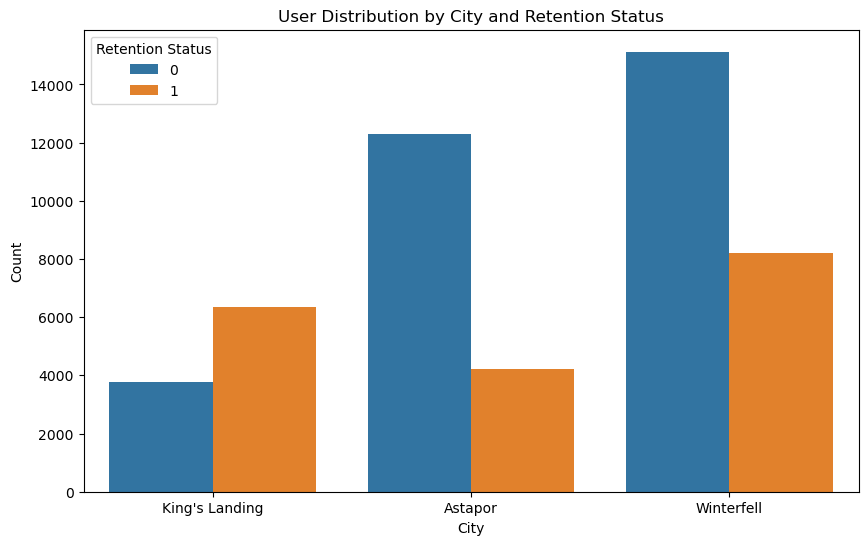

In [89]:
# Create visualizations
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='city', hue='retention_status')
plt.title('User Distribution by City and Retention Status')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Retention Status')
plt.show()

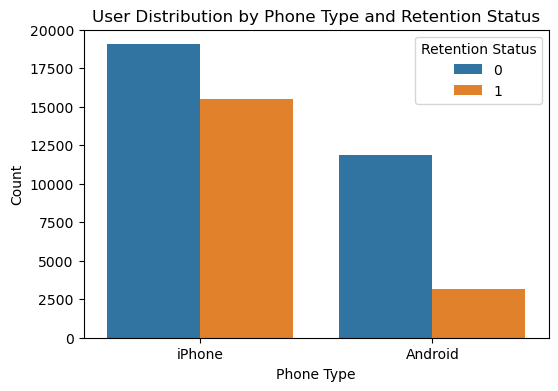

In [90]:
# Plot count plot of phone type
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='phone', hue='retention_status')
plt.title('User Distribution by Phone Type and Retention Status')
plt.xlabel('Phone Type')
plt.ylabel('Count')
plt.legend(title='Retention Status')
plt.show()

In [91]:
data = pd.get_dummies(data, columns=['city'], drop_first=False)
data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention_status,city_Astapor,city_King's Landing,city_Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,0,0,1


In [92]:
data['ultimate_black_user'] = data['ultimate_black_user'].astype(int)

In [93]:
data = data.drop(['phone'], axis=1)

In [94]:
avg_rating_of_driver_mean = data['avg_rating_of_driver'].mean()

data['avg_rating_of_driver'].fillna(avg_rating_of_driver_mean, inplace=True)

avg_rating_by_driver_mean = data['avg_rating_by_driver'].mean()

data['avg_rating_by_driver'].fillna(avg_rating_by_driver_mean, inplace=True)

In [95]:
data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention_status,city_Astapor,city_King's Landing,city_Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,0,1


In [96]:
print(data.isnull().sum())

trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
retention_status          0
city_Astapor              0
city_King's Landing       0
city_Winterfell           0
dtype: int64


In [99]:
data.dtypes

trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
surge_pct                        float64
ultimate_black_user                int64
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
retention_status                   int64
city_Astapor                       uint8
city_King's Landing                uint8
city_Winterfell                    uint8
dtype: object

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features (excluding datetime columns) and target variable
X = data.drop(['retention_status', 'signup_date', 'last_trip_date'], axis=1)
y = data['retention_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7034


I chose to build a logistic regression model for predicting whether a user will be active in their 6th month on the system. Logistic regression is suitable for binary classification tasks, making it a natural choice for this problem. It models the probability of a user being active based on the input features. Alternatives like decision trees, random forests, and support vector machines were considered, but logistic regression is interpretable, computationally efficient, and provides a baseline model for comparison.

Insights from the model can guide Ultimate's strategies to improve rider retention:

Feature Importance: See which factors most influence rider retention. For example, Ultimate could focus on improving average rating of drivers, encouraging more rides in the first 30 days, or offering promotions during weekdays.
Early Intervention: If a user is predicted to be at risk of not being active in their 6th month, Ultimate can proactively engage with them through targeted promotions or rewards.
Data-Driven Decision-Making: By understanding the significant factors affecting retention, Ultimate can allocate resources effectively for initiatives that have the highest impact.